In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\pkawk\OneDrive\Pulpit\Patryk\Patryk - materiały naukowe\Analiza danych i programowanie w Pythonie\Materiały na zajęcia\Zadanie egzaminacyjne\mobile-price-classification_train.csv"
df = pd.read_csv(file_path)
pd.set_option('display.max.columns', None)
display(df.head())
df.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [65]:
print('Liczba wierszy w tabeli to:',df.shape[0],'natomiast liczba kolumn to:',df.shape[1],'.')

Liczba wierszy w tabeli to: 2000 natomiast liczba kolumn to: 21 .


In [66]:
empty_rows_count = df.isna().all(axis=1).sum()
print(f"Liczba całkowicie pustych wierszy: {empty_rows_count}")

# Usuwanie pustych wierszy tylko wtedy, gdy ich liczba jest większa niż 0
if empty_rows_count > 0:
    df.dropna(how='all', inplace=True)
    print("Puste wiersze zostały usunięte.")
else:
    print("Brak całkowicie pustych wierszy do usunięcia.")



Liczba całkowicie pustych wierszy: 0
Brak całkowicie pustych wierszy do usunięcia.


In [67]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [68]:
total_duplicated_rows_count = df.duplicated(keep=False).sum()
print(f"Liczba całych zduplikowanych wierszy: {total_duplicated_rows_count}")

if total_duplicated_rows_count > 0:
    df.drop_duplicates(inplace=True)
    print("Zduplikowane wiersze zostały usunięte.")
else:
    print("Brak całkowicie zduplikowanych wierszy do usunięcia.")


Liczba całych zduplikowanych wierszy: 0
Brak całkowicie zduplikowanych wierszy do usunięcia.


In [69]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [70]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


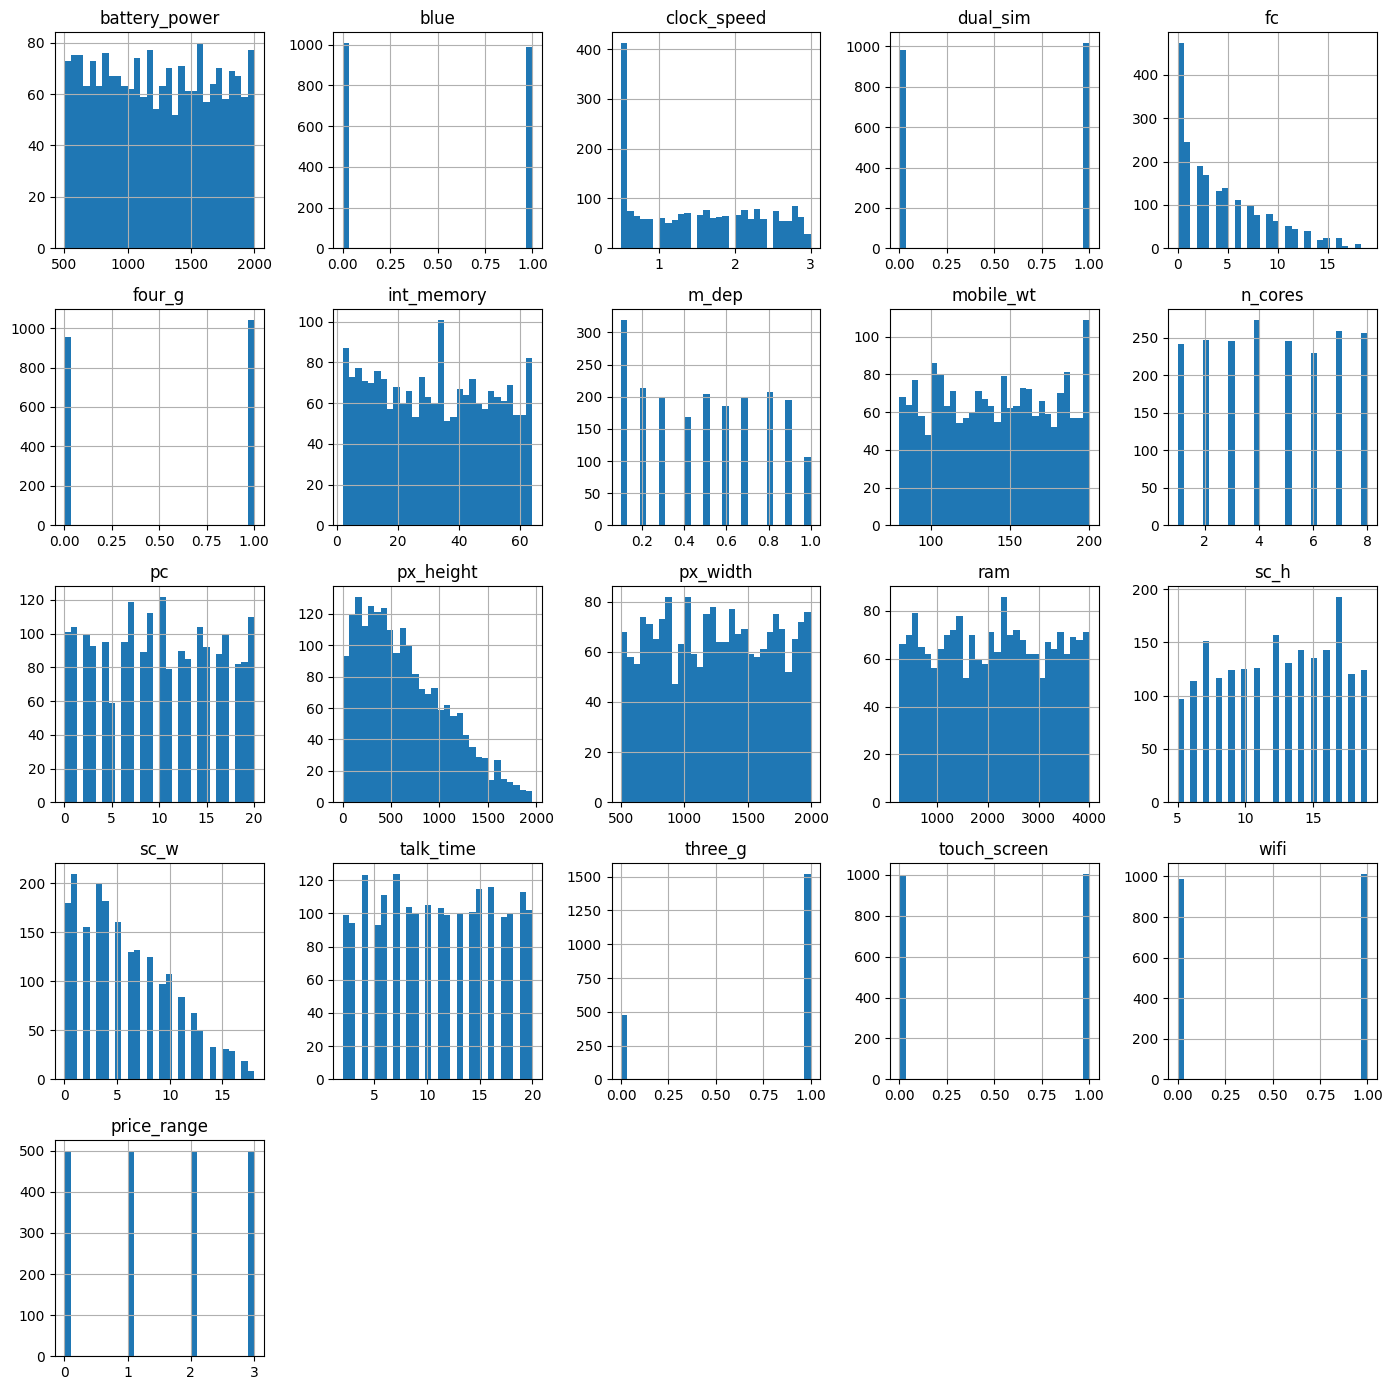

In [95]:
df.hist(figsize=(14, 14), bins=30)
plt.tight_layout()
plt.show()


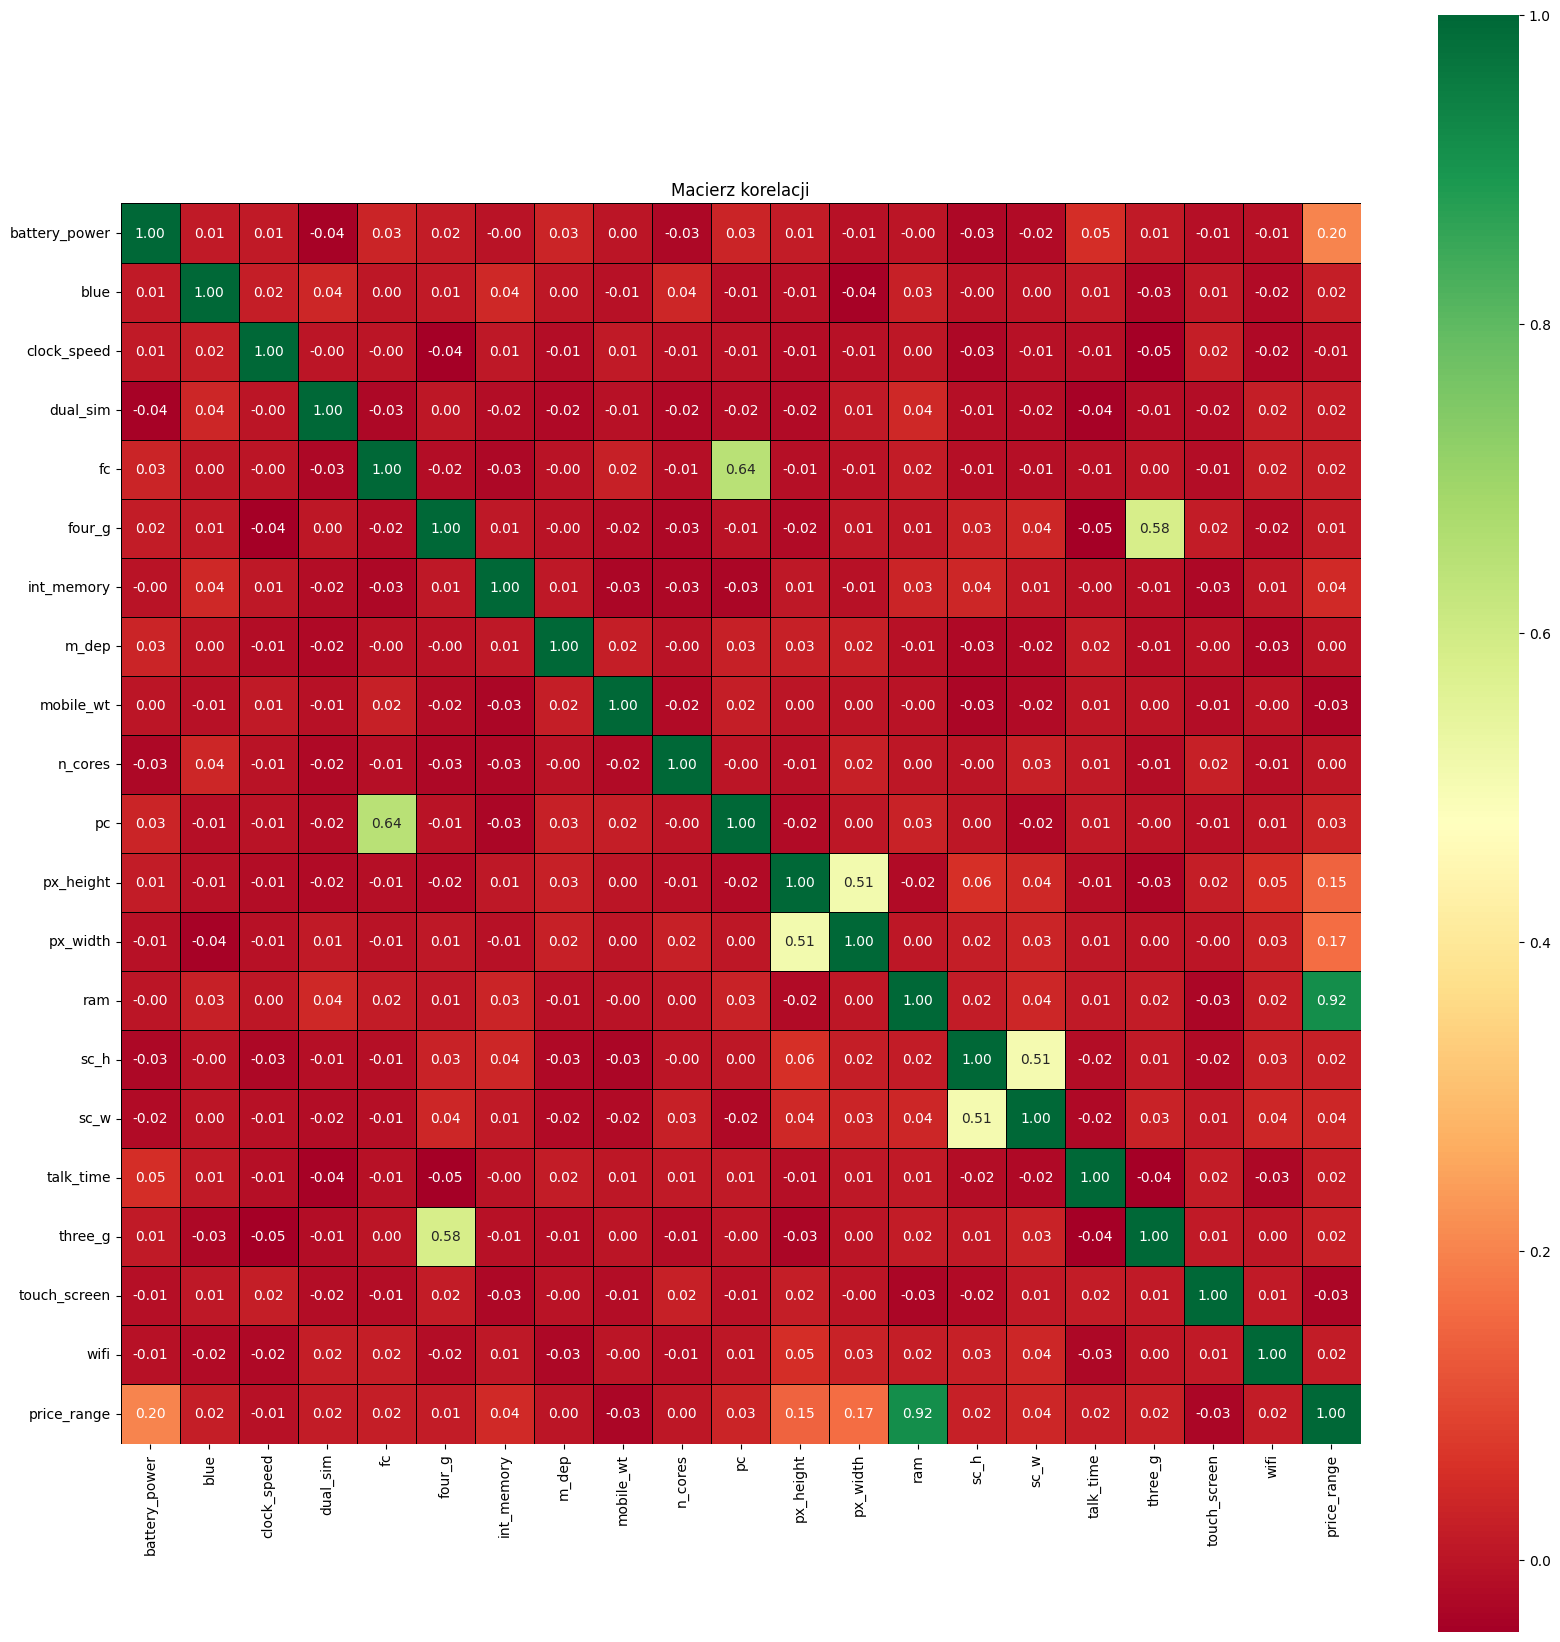

In [105]:
plt.figure(figsize=(20, 21))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap = 'RdYlGn', linewidths=0.5, linecolor='black', square=True)
plt.title('Macierz korelacji')
plt.show()

In [106]:
nazwa, rozszerzenie = os.path.splitext(file_path)
new_file_path = f"{nazwa}_sprawdzony{rozszerzenie}"

df.to_csv(new_file_path, index=False)

print(f"Wynikowy DataFrame został zapisany do: {new_file_path}")

Wynikowy DataFrame został zapisany do: C:\Users\pkawk\OneDrive\Pulpit\Patryk\Patryk - materiały naukowe\Analiza danych i programowanie w Pythonie\Materiały na zajęcia\Zadanie egzaminacyjne\mobile-price-classification_train_sprawdzony.csv
